In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
#import the dataset and visualize the dataset
dataset = pd.read_csv('./dataset/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


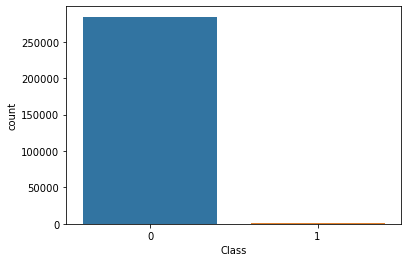

In [3]:
#visualize the target class 'Class'
sns.countplot(x='Class', data=dataset)

In [4]:
#seperating positive and negative classes
positiveDataset = dataset.loc[dataset['Class'] == 1]
negativeDataset = dataset.loc[dataset['Class'] == 0]

In [5]:
#creating training and testing set with negative class split 1:1 and positive class split 4:1, also keeping random_state constant so that all splits are same
positiveTrain, positiveTest = tts(positiveDataset, test_size=0.2, random_state=21)
negativeTrain, negativeTest = tts(negativeDataset, test_size=0.5)
trainDataset = positiveTrain.append(negativeTrain)
testDataset = positiveTest.append(negativeTest)

In [6]:
#create Regression object and scale the dataset
classifier = RandomForestClassifier(n_estimators=500, max_depth=3)
yTrain = trainDataset['Class']
yTest = testDataset['Class']
xTrain = trainDataset.drop(columns=['Class'])
xTest = testDataset.drop(columns=['Class'])
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

In [7]:
#fit the dataset to the train values
classifier.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=3, n_estimators=500)

In [8]:
#predict the model on the train values and check results
predTrain = classifier.predict(xTrain)
print(classification_report(yTrain, predTrain))
print('ROC AUC Score: ',roc(yTrain, predTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142157
           1       0.93      0.68      0.79       393

    accuracy                           1.00    142550
   macro avg       0.96      0.84      0.89    142550
weighted avg       1.00      1.00      1.00    142550

ROC AUC Score:  0.8421688409909691


In [9]:
#predict test values and check results
predTest = classifier.predict(xTest)
print(classification_report(yTest, predTest))
print('ROC AUC Score: ',roc(yTest, predTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.69      0.75      0.71        99

    accuracy                           1.00    142257
   macro avg       0.84      0.87      0.86    142257
weighted avg       1.00      1.00      1.00    142257

ROC AUC Score:  0.8736177884871592
